In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cloud-computing-performance-metrics/vmCloud_data.csv


In [2]:
import pandas as pd
df = pd.read_csv('/kaggle/input/cloud-computing-performance-metrics/vmCloud_data.csv')
df.head()

,vm_id,timestamp,cpu_usage,memory_usage,network_traffic,power_consumption,num_executed_instructions,execution_time,energy_efficiency,task_type,task_priority,task_status
0,c5215826-6237-4a33-9312-72c1df909881,2023-01-25 09:10:54,54.881350,78.950861,164.775973,287.808986,7527.0,69.345575,0.553589,network,medium,waiting
1,29690bc6-1f34-403b-b509-a1ecb1834fb8,2023-01-26 04:46:34,71.518937,29.901883,NaN,362.273569,5348.0,41.396040,0.349856,io,high,completed
2,2e55abc3-5bad-46cb-b445-a577f5e9bf2a,2023-01-13 23:39:47,NaN,92.709195,203.674847,231.467903,5483.0,24.602549,0.796277,io,medium,completed
3,e672e32f-c134-4fbc-992b-34eb63bef6bf,2023-02-09 11:45:49,54.488318,88.100960,NaN,195.639954,5876.0,16.456670,0.529511,compute,high,completed
4,f38b8b50-6926-4533-be4f-89ad11624071,2023-06-14 08:27:26,42.365480,NaN,NaN,359.451537,3361.0,55.307992,0.351907,NaN,medium,waiting


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 12 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   vm_id                      object 
 1   timestamp                  object 
 2   cpu_usage                  float64
 3   memory_usage               float64
 4   network_traffic            float64
 5   power_consumption          float64
 6   num_executed_instructions  float64
 7   execution_time             float64
 8   energy_efficiency          float64
 9   task_type                  object 
 10  task_priority              object 
 11  task_status                object 
dtypes: float64(7), object(5)
memory usage: 183.1+ MB


In [4]:
df.describe

<bound method NDFrame.describe of                                         vm_id            timestamp  cpu_usage  \
0        c5215826-6237-4a33-9312-72c1df909881  2023-01-25 09:10:54  54.881350   
1        29690bc6-1f34-403b-b509-a1ecb1834fb8  2023-01-26 04:46:34  71.518937   
2        2e55abc3-5bad-46cb-b445-a577f5e9bf2a  2023-01-13 23:39:47        NaN   
3        e672e32f-c134-4fbc-992b-34eb63bef6bf  2023-02-09 11:45:49  54.488318   
4        f38b8b50-6926-4533-be4f-89ad11624071  2023-06-14 08:27:26  42.365480   
...                                       ...                  ...        ...   
1999995  8fb401eb-a992-4c70-82fc-2c2275970f34  2023-02-13 16:02:13  74.519189   
1999996  d6359442-7595-4bbb-ac95-9a13d83d3029  2023-07-03 11:44:45  93.964350   
1999997  f3b71ef0-be37-4b2f-b3d8-ad9101d7f0f2  2023-03-28 19:12:09  92.835858   
1999998  c2b29a0c-5c6f-46ac-b104-9b1bc7d3c3d2  2023-02-27 21:13:16  89.169392   
1999999  89b1f28f-6134-4ba5-8e9f-8777ba43887a  2023-01-07 14:02:35  49.1870

In [5]:
df.shape

(2000000, 12)

In [6]:
df.columns

Index(['vm_id', 'timestamp', 'cpu_usage', 'memory_usage', 'network_traffic',
       'power_consumption', 'num_executed_instructions', 'execution_time',
       'energy_efficiency', 'task_type', 'task_priority', 'task_status'],
      dtype='object')

In [7]:
threshold = df['execution_time'].quantile(0.95)
df['latency_spike'] = (df['execution_time'] > threshold).astype(int)

df['latency_spike'].value_counts(normalize=True)

latency_spike
0    0.954995
1    0.045005
Name: proportion, dtype: float64

EDA

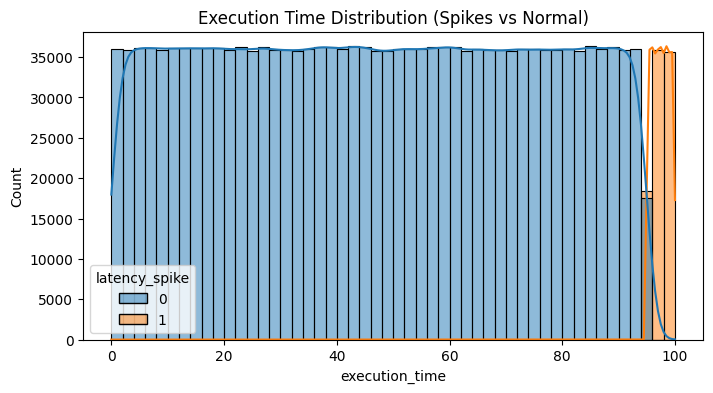

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(data=df, x='execution_time', hue='latency_spike', bins=50, kde=True)
plt.title("Execution Time Distribution (Spikes vs Normal)")
plt.show()


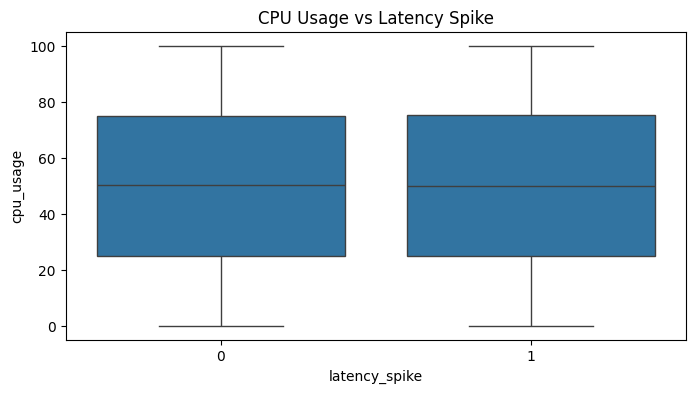

In [9]:
# CPU usage
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='latency_spike', y='cpu_usage')
plt.title("CPU Usage vs Latency Spike")
plt.show()

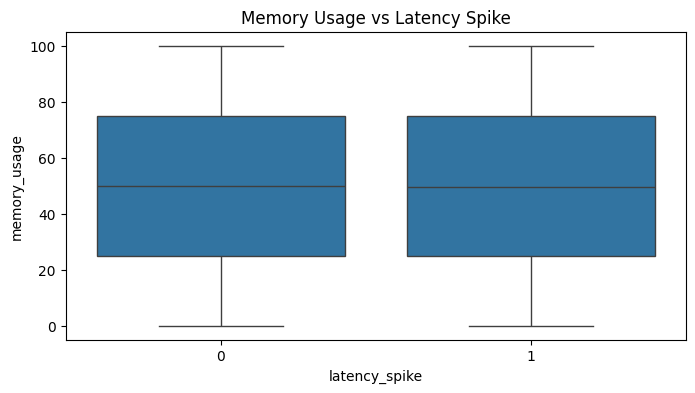

In [10]:
# Memory usage
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='latency_spike', y='memory_usage')
plt.title("Memory Usage vs Latency Spike")
plt.show()

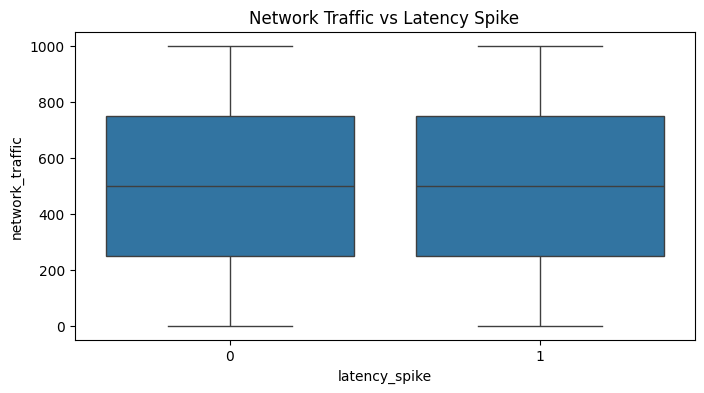

In [11]:
# Network traffic
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='latency_spike', y='network_traffic')
plt.title("Network Traffic vs Latency Spike")
plt.show()

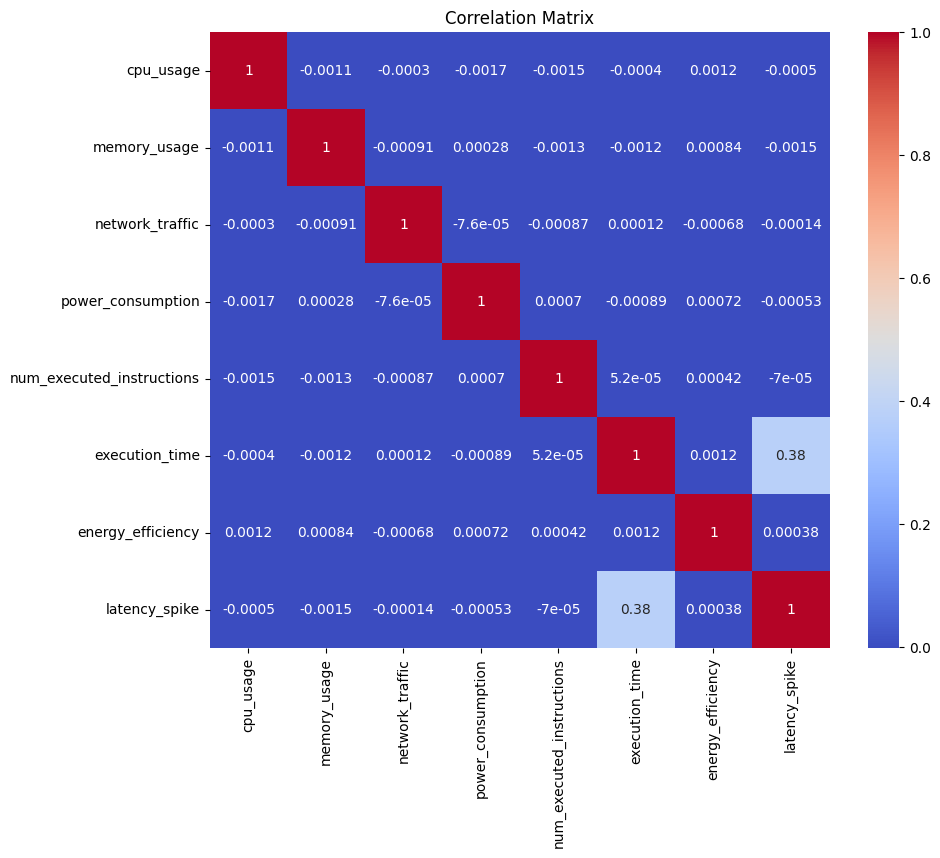

In [12]:
# Correaltion
plt.figure(figsize=(10,8))
corr = df[['cpu_usage','memory_usage','network_traffic','power_consumption',
           'num_executed_instructions','execution_time','energy_efficiency','latency_spike']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

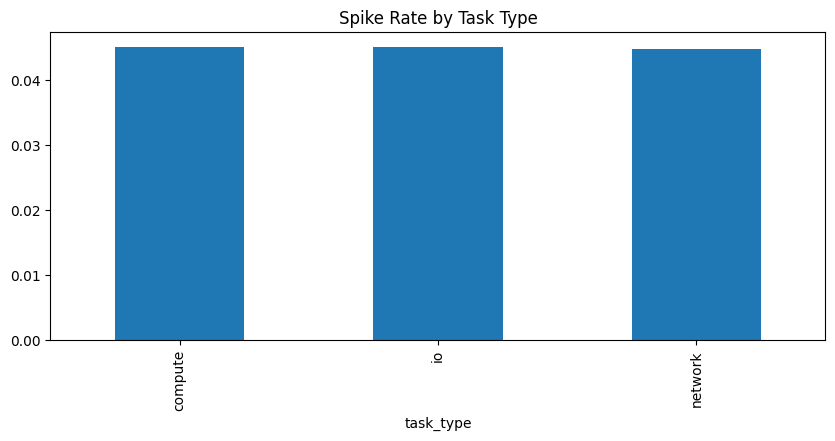

In [13]:
spike_by_task = df.groupby('task_type')['latency_spike'].mean().sort_values(ascending=False)
spike_by_task.plot(kind='bar', figsize=(10,4), title='Spike Rate by Task Type')
plt.show()

Preparing data

In [14]:
features = [
    'cpu_usage',
    'memory_usage',
    'network_traffic',
    'power_consumption',
    'num_executed_instructions',
    'energy_efficiency',
    'task_priority'
]

X = df[features]
y = df['latency_spike']

In [15]:
## Encode categorical values
X.columns

Index(['cpu_usage', 'memory_usage', 'network_traffic', 'power_consumption',
       'num_executed_instructions', 'energy_efficiency', 'task_priority'],
      dtype='object')

In [16]:
X.shape

(2000000, 7)

In [17]:
y.shape

(2000000,)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [19]:
y_train.value_counts(normalize=True)

latency_spike
0    0.954996
1    0.045004
Name: proportion, dtype: float64

In [20]:
## using XGBoost
from xgboost import XGBClassifier
neg, pos = y_train.value_counts()
scale_pos_weight = neg / pos
scale_pos_weight

21.220061938422653

In [21]:
model = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    eval_metric='auc',
    random_state=42
)

model.fit(X_train, y_train)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:task_priority: object

In [ ]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

y_pred_prob = model.predict_proba(X_test)[:,1]
y_pred = model.predict(X_test)

print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# Sort by time
df = df.sort_values('timestamp')

# Create lag features safely
if 'execution_time' in df.columns:
    df['exec_time_lag1'] = df['execution_time'].shift(1)
    df['exec_time_roll5'] = df['execution_time'].rolling(5).mean()

if 'cpu_usage' in df.columns:
    df['cpu_lag1'] = df['cpu_usage'].shift(1)
    df['cpu_roll5'] = df['cpu_usage'].rolling(5).mean()

if 'memory_usage' in df.columns:
    df['mem_lag1'] = df['memory_usage'].shift(1)

# Encode categorical if needed
if 'task_priority' in df.columns:
    df = pd.get_dummies(df, columns=['task_priority'], drop_first=True)

# Drop rows with NaN from lag/rolling
df = df.dropna()

# Define candidate features
candidate_features = [
    'cpu_usage','memory_usage','network_traffic','power_consumption',
    'num_executed_instructions','energy_efficiency',
    'exec_time_lag1','cpu_lag1','mem_lag1','exec_time_roll5','cpu_roll5',
    'task_priority_low','task_priority_medium'
]

# Keep only features that exist
features = [f for f in candidate_features if f in df.columns]

X = df[features]
y = df['latency_spike']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Handle imbalance
neg, pos = y_train.value_counts()
scale_pos_weight = neg / pos

# Train model
model = XGBClassifier(
    n_estimators=400,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    eval_metric='auc',
    random_state=42
)

model.fit(X_train, y_train)

# Evaluate
y_pred_prob = model.predict_proba(X_test)[:,1]
y_pred = model.predict(X_test)

print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, precision_recall_curve

# Ensure timestamp is datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df = df.dropna(subset=['timestamp'])

# Sort by time
df = df.sort_values('timestamp')

# Create latency spike target if not present
if 'latency_spike' not in df.columns:
    threshold = df['execution_time'].quantile(0.95)
    df['latency_spike'] = (df['execution_time'] > threshold).astype(int)

# Create temporal features
df['exec_time_lag1'] = df['execution_time'].shift(1)
df['exec_time_roll5'] = df['execution_time'].rolling(5).mean()
df['cpu_lag1'] = df['cpu_usage'].shift(1)
df['cpu_roll5'] = df['cpu_usage'].rolling(5).mean()
df['mem_lag1'] = df['memory_usage'].shift(1)

# Encode categorical if needed
if 'task_priority' in df.columns:
    df = pd.get_dummies(df, columns=['task_priority'], drop_first=True)

# Drop rows with NaN from lag/rolling
df = df.dropna()

# Feature selection
candidate_features = [
    'cpu_usage','memory_usage','network_traffic','power_consumption',
    'num_executed_instructions','energy_efficiency',
    'exec_time_lag1','exec_time_roll5','cpu_lag1','cpu_roll5','mem_lag1',
    'task_priority_low','task_priority_medium'
]
features = [f for f in candidate_features if f in df.columns]

X = df[features]
y = df['latency_spike']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Handle class imbalance
neg, pos = y_train.value_counts()
scale_pos_weight = neg / pos

# Train model
model = XGBClassifier(
    n_estimators=400,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    eval_metric='auc',
    random_state=42
)

model.fit(X_train, y_train)

# Predict probabilities
y_pred_prob = model.predict_proba(X_test)[:,1]

# Compute precision-recall curve
prec, rec, thresh = precision_recall_curve(y_test, y_pred_prob)

# Choose threshold where recall is closest to 0.5 (change target_recall if needed)
target_recall = 0.5
idx = np.argmin(np.abs(rec - target_recall))
best_threshold = thresh[idx] if idx < len(thresh) else 0.5

# Apply best threshold
y_pred_best = (y_pred_prob >= best_threshold).astype(int)

# Evaluate
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))
print("Chosen threshold:", best_threshold)
print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))